In [1]:
#data analysis on USvideos.csv file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

df =  pd.read_csv('USvideos.csv')
df.head()


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [2]:
df.shape


(40949, 16)

In [3]:
df = df.drop_duplicates()
df.shape


(40901, 16)

In [4]:
df.describe()


,category_id,views,likes,dislikes,comment_count
count,40901.000000,4.090100e+04,4.090100e+04,4.090100e+04,4.090100e+04
mean,19.970588,2.360678e+06,7.427173e+04,3.711722e+03,8.448567e+03
std,7.569362,7.397719e+06,2.289999e+05,2.904624e+04,3.745139e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.419720e+05,5.416000e+03,2.020000e+02,6.130000e+02
50%,24.000000,6.810640e+05,1.806900e+04,6.300000e+02,1.855000e+03
75%,25.000000,1.821926e+06,5.533800e+04,1.936000e+03,5.752000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 40901 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40901 non-null  object
 1   trending_date           40901 non-null  object
 2   title                   40901 non-null  object
 3   channel_title           40901 non-null  object
 4   category_id             40901 non-null  int64 
 5   publish_time            40901 non-null  object
 6   tags                    40901 non-null  object
 7   views                   40901 non-null  int64 
 8   likes                   40901 non-null  int64 
 9   dislikes                40901 non-null  int64 
 10  comment_count           40901 non-null  int64 
 11  thumbnail_link          40901 non-null  object
 12  comments_disabled       40901 non-null  bool  
 13  ratings_disabled        40901 non-null  bool  
 14  video_error_or_removed  40901 non-null  bool  
 15  de

In [7]:
columns_to_remove = ['thumbnail_link', 'description']
df = df.drop(columns = columns_to_remove)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 40901 entries, 0 to 40948
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40901 non-null  object
 1   trending_date           40901 non-null  object
 2   title                   40901 non-null  object
 3   channel_title           40901 non-null  object
 4   category_id             40901 non-null  int64 
 5   publish_time            40901 non-null  object
 6   tags                    40901 non-null  object
 7   views                   40901 non-null  int64 
 8   likes                   40901 non-null  int64 
 9   dislikes                40901 non-null  int64 
 10  comment_count           40901 non-null  int64 
 11  comments_disabled       40901 non-null  bool  
 12  ratings_disabled        40901 non-null  bool  
 13  video_error_or_removed  40901 non-null  bool  
dtypes: bool(3), int64(5), object(6)
memory usage: 3.9+ MB


In [10]:
from datetime import datetime
import datetime
df["trending_date"] = df["trending_date"].apply(lambda x : datetime.datetime.strptime(x, '%y.%d.%m'))
df.head(3)


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,False,False,False
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,False,False,False
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,False,False,False


In [11]:
df['publish_time'] = pd.to_datetime(df['publish_time'])
df.head(2)


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01+00:00,SHANtell martin,748374,57527,2966,15954,False,False,False
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00+00:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,False,False,False


In [12]:
df['publish_month'] = df['publish_time'].dt.month
df['publish_day'] = df['publish_time'].dt.day
df['publish_hour'] = df['publish_time'].dt.hour
df.head(2)


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,publish_month,publish_day,publish_hour
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01+00:00,SHANtell martin,748374,57527,2966,15954,False,False,False,11,13,17
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00+00:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,False,False,False,11,13,7


In [13]:
print(sorted(df["category_id"].unique()))
[1,2,10,15,17,19,20,222,23,24,25,26,27,28,29,30,43]


[1, 2, 10, 15, 17, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 43]


[1, 2, 10, 15, 17, 19, 20, 222, 23, 24, 25, 26, 27, 28, 29, 30, 43]

In [14]:
df['category_name'] = np.nan
df.loc[(df["category_id"] == 1), "category_name"] = 'Film and Animation'
df.loc[(df["category_id"] == 2), "category_name"] = 'Autos and Vehicles'
df.loc[(df["category_id"] == 10), "category_name"] = 'Music'
df.loc[(df["category_id"] == 15), "category_name"] = 'Pets and Animals'
df.loc[(df["category_id"] == 17), "category_name"] = 'Sports'
df.loc[(df["category_id"] == 19), "category_name"] = 'Travel and Events'
df.loc[(df["category_id"] == 20), "category_name"] = 'Gaming'
df.loc[(df["category_id"] == 22), "category_name"] = 'People and Blogs'
df.loc[(df["category_id"] == 23), "category_name"] = 'Comedy'
df.loc[(df["category_id"] == 24), "category_name"] = 'Entertainment'
df.loc[(df["category_id"] == 25), "category_name"] = 'News and Politics'
df.loc[(df["category_id"] == 26), "category_name"] = 'How to and Style'
df.loc[(df["category_id"] == 27), "category_name"] = 'Education'
df.loc[(df["category_id"] == 28), "category_name"] = 'Science and Technlogy'
df.loc[(df["category_id"] == 29), "category_name"] = 'Non Profits and Activism'
df.loc[(df["category_id"] == 30), "category_name"] = 'Movies'
df.loc[(df["category_id"] == 43), "category_name"] = 'Shows'


df.head()


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,publish_month,publish_day,publish_hour,category_name
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01+00:00,SHANtell martin,748374,57527,2966,15954,False,False,False,11,13,17,People and Blogs
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00+00:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,False,False,False,11,13,7,Entertainment
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,False,False,False,11,12,19,Comedy
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04+00:00,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,False,False,False,11,13,11,Entertainment
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41+00:00,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,False,False,False,11,12,18,Entertainment


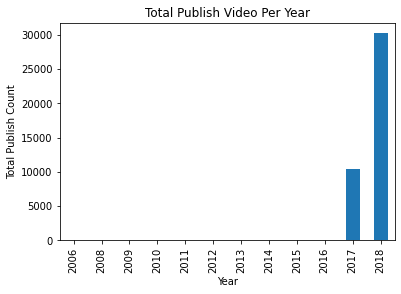

In [16]:
df['year'] =  df['publish_time'].dt.year
yearly_counts = df.groupby('year') ['video_id'].count()

#create a bar chart
yearly_counts.plot(kind='bar', xlabel='Year', ylabel='Total Publish Count', title='Total Publish Video Per Year')

#show chart
plt.show()


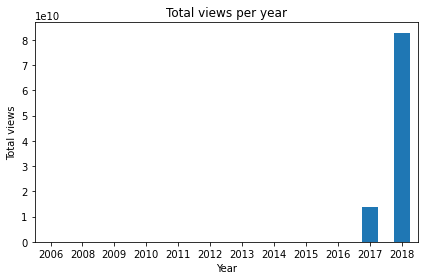

In [18]:
#group by year and sum the views for each year
yearly_views = df.groupby('year')['views'].sum()

#Create a bar chart
yearly_views.plot(kind='bar', xlabel='Year', ylabel='Total views', title='Total views per year')
plt.xticks(rotation=0)
plt.tight_layout()

#show the bar chart
plt.show()


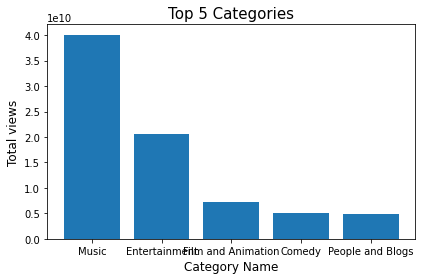

In [20]:
#Group the data by 'category_name' and calculate the sum of views in each category
category_views = df.groupby('category_name')['views'].sum().reset_index()

#Sort the categories by views in descending order
top_categories = category_views.sort_values(by='views', ascending=False).head(5)

#create a bar plot to visualize the top 5 categories
plt.bar(top_categories['category_name'], top_categories['views'])
plt.xlabel('Category Name', fontsize=12)
plt.ylabel('Total views', fontsize=12)
plt.title('Top 5 Categories', fontsize= 15)
plt.tight_layout()
plt.show()


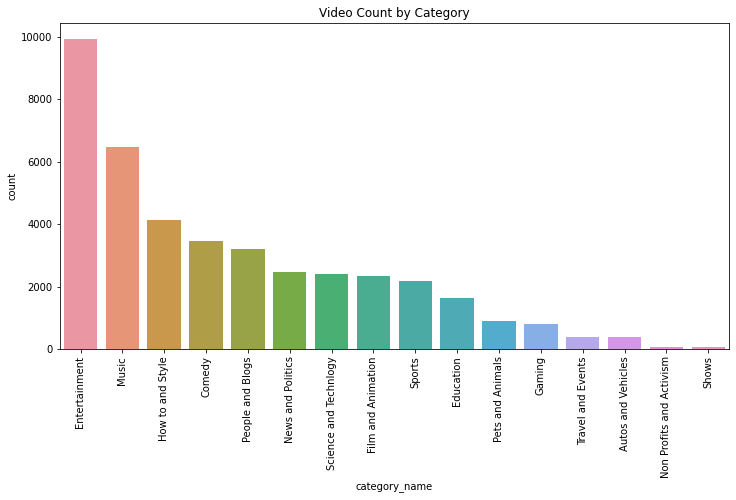

In [21]:
plt.figure(figsize=(12,6))
sns.countplot(x='category_name', data=df, order=df['category_name'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Video Count by Category')
plt.show()


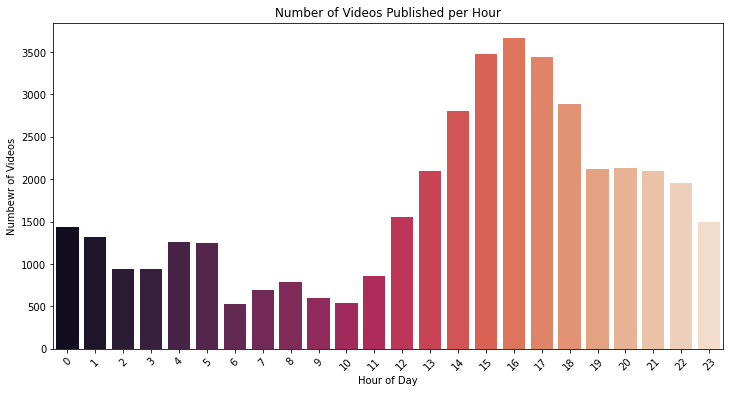

In [23]:
#Count the number of videos published per hour
videos_per_hour = df['publish_hour'].value_counts().sort_index()

#create a bar plot
plt.figure(figsize=(12,6))
sns.barplot(x=videos_per_hour.index, y=videos_per_hour.values, palette='rocket')
plt.title('Number of Videos Published per Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Numbewr of Videos')
plt.xticks(rotation=45)
plt.show()



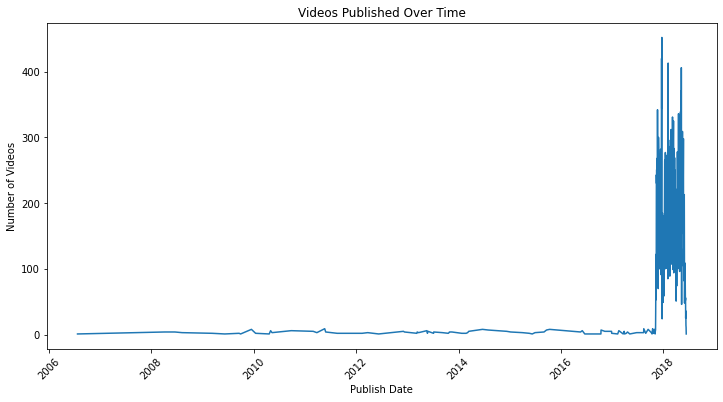

In [24]:
df['publish_time'] = pd.to_datetime(df['publish_time'])
df['publish_date'] = df['publish_time'].dt.date
video_count_by_date = df.groupby('publish_date').size()
plt.figure(figsize=(12,6))
sns.lineplot(data=video_count_by_date)
plt.title("Videos Published Over Time")
plt.xlabel('Publish Date')
plt.ylabel('Number of Videos')
plt.xticks(rotation=45)
plt.show()



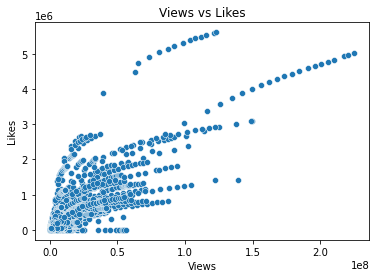

In [31]:
#scatter plot between 'views' and 'likes'
sns.scatterplot(data=df, x= 'views', y= 'likes')
plt.title('Views vs Likes')
plt.xlabel('Views')
plt.ylabel('Likes')
plt.show()


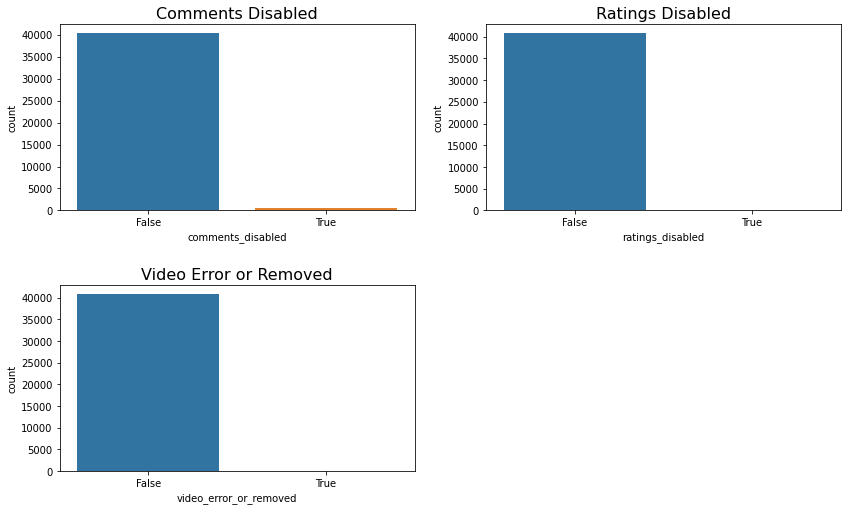

In [32]:
plt.figure(figsize= (14,8))
plt.subplots_adjust(wspace = 0.2, hspace = 0.4, top = 0.9)
plt.subplot(2,2,1)
g = sns.countplot(x='comments_disabled', data=df)
g.set_title("Comments Disabled", fontsize=16)
plt.subplot(2,2,2)
g1 = sns.countplot(x='ratings_disabled', data=df)
g1.set_title("Ratings Disabled", fontsize=16)
plt.subplot(2,2,3)
g2 = sns.countplot(x='video_error_or_removed', data=df)
g2.set_title("Video Error or Removed", fontsize=16)
plt.show()



In [30]:
corr_matrix = df['views'].corr(df['likes'])
corr_matrix


0.8491785476230503